In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as c
import sympy as sy
from sympy import *

In [11]:
werte_1_1_L = np.array([102.4, 92.0, 87.7, 85.6, 85.5, 84.7, 73.1, 69.8, 55.7, 52.5], np.float32)
werte_1_1_B = np.array([49.4, 36.0, 36.1, 42.5, 33.8, 34.5, 29.0, 28.65, 25.25, 26.1], np.float32)
werte_1_2_L = np.array([102.7,92.1, 88.8, 85.7, 84.6, 84.1, 72.9, 70.0, 56.3, 53.3], np.float32)
werte_1_2_B = np.array([49.1, 36.1, 35.4, 43.2, 34.0, 34.7, 30.7, 29.7, 25.1, 27.6], np.float32)
werte_2_1_L = np.array([138.2, 136.1, 135.0, 133.3, 132.2, 131.2, 131.4, 119.3, 119.4, 89.15], np.float32)
werte_2_1_B = np.array([50.7, 42.7, 44.5, 43.3, 47.9, 44.4, 41.45, 36.2, 36.25, 34.2], np.float32)
werte_2_2_L = np.array([138.2, 135.7, 134.7, 133.0, 133.0, 132.0, 131.2, 120.7, 119.0, 88.55], np.float32)
werte_2_2_B = np.array([49.9, 42.9, 43.3, 42.8, 48.6, 45.55, 41.9, 36.8, 35.6, 33.2], np.float32)

# print(np.mean([werte_1_1_L, werte_1_2_L], axis=0))

def std(am, werte):
    summen_der_quadrate = 0
    for wert in werte:
        summen_der_quadrate+=(wert-am)**2       
    return np.sqrt(summen_der_quadrate/(werte.size-1))

def stu(std, werte):
    return std/np.sqrt(werte.size)

def fehler(f, werte, variablen):
    zMax = 0
    for i in range(werte.size):
        dif = np.abs(sy.diff(f, variablen[i]))
        zMax += dif * werte[i]
    for j in range(werte.size):
        zMax = sub(zMax, variablen[j], werte[j])
    return zMax

def sub(zMax, variable, wert):
    return zMax.subs([(variable, wert)])

werte_1_laenge = np.mean([werte_1_1_L, werte_1_2_L], axis=0).astype(int)
werte_1_breite = np.mean([werte_1_1_B, werte_1_2_B], axis=0).astype(int)
werte_2_laenge = np.mean([werte_2_1_L, werte_2_2_L], axis=0).astype(int)
werte_2_breite = np.mean([werte_2_1_B, werte_2_2_B], axis=0).astype(int)

am_1_laenge = np.mean(werte_1_laenge)
am_1_breite = np.mean(werte_1_breite)
am_2_laenge = np.mean(werte_2_laenge)
am_2_breite = np.mean(werte_2_breite)

std_1_laenge = std(am_1_laenge, werte_1_laenge)
std_1_breite = std(am_1_breite, werte_1_breite)
std_2_laenge = std(am_2_laenge, werte_2_laenge)
std_2_breite = std(am_2_breite, werte_2_breite)

stu_1_laenge = stu(std_1_laenge, werte_1_laenge)
stu_1_breite = stu(std_1_breite, werte_1_breite)
stu_2_laenge = stu(std_2_laenge, werte_2_laenge)
stu_2_breite = stu(std_2_breite, werte_2_breite)



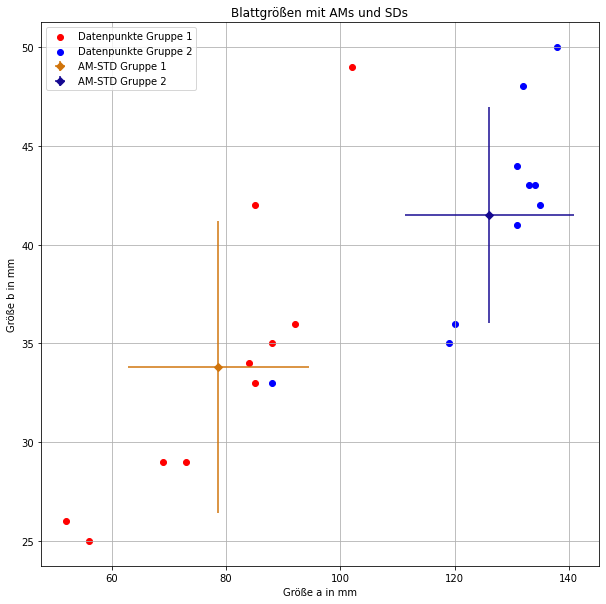

In [4]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(werte_1_laenge, werte_1_breite, color='r', label='Datenpunkte Gruppe 1')
ax.scatter(werte_2_laenge, werte_2_breite, color='b', label='Datenpunkte Gruppe 2')

ax.errorbar(am_1_laenge, am_1_breite, xerr=std_1_laenge, yerr=std_1_breite, fmt='D', color='#d0740b', label='AM-STD Gruppe 1')
ax.errorbar(am_2_laenge, am_2_breite, xerr=std_2_laenge, yerr=std_2_breite, fmt='D', color='#150891', label='AM-STD Gruppe 2')

ax.set(xlabel='Größe a in mm', ylabel='Größe b in mm',
       title='Blattgrößen mit AMs und SDs')
ax.legend()
ax.grid()

#fig.savefig("test.png")
plt.show()


In [18]:
# 1.3
a_1 = werte_1_laenge*werte_1_breite
a_2 = werte_2_laenge*werte_2_breite
r_1 = werte_1_laenge/werte_1_breite
r_2 = werte_2_laenge/werte_2_breite

am_a_1 = np.mean(a_1)
am_a_2 = np.mean(a_2)
am_r_1 = np.mean(r_1)
am_r_2 = np.mean(r_2)

std_a_1 = std(am_a_1, a_1)
std_a_2 = std(am_a_2, a_2)
std_r_1 = std(am_r_1, r_1)
std_r_2 = std(am_r_2, r_2)

stu_a_1 = stu(std_a_1, a_1)
stu_a_2 = stu(std_a_2 , a_2)
stu_r_1 = stu(std_r_1, r_1)
stu_r_2 = stu(std_r_2, r_2)

a_best_1 = am_1_laenge*am_1_breite  
a_best_2 = am_2_laenge*am_2_breite  
r_best_1 = am_1_laenge/am_1_breite 
r_best_2 = am_2_laenge/am_2_breite




b, l = symbols('b l')

f1 = b * l
f2 = l / b



variablen = [l,b]

#print(fehler(f1, np.array([stu_1_laenge, stu_1_breite]), variablen))
#print(fehler(f2, np.array([stu_2_laenge, stu_2_breite]), variablen))


def vertraeglichkeit(am_1, am_2, stu_1, stu_2):
    return (np.abs(am_1-am_2)/(sqrt((stu_1**2)*(stu_2**2))))

print(vertraeglichkeit(am_r_1, am_r_2, stu_r_1, stu_r_2))
print(vertraeglichkeit(am_a_1, am_a_2, stu_a_1, stu_a_2))
print(vertraeglichkeit(am_1_laenge, am_2_laenge, stu_1_laenge, stu_2_laenge))
print(vertraeglichkeit(am_1_breite, am_2_breite, stu_1_breite, stu_2_breite))

122.256488550603
0.0197007234024744
2.03112334141600
1.90427162131395
